# III. Exercice : Le neurone

## 1. Modèle Integrate-and-Fire

Considérons un neurone "Integrate-and-Fire" décrit par l'équation suivante
$$\tau \frac{dV}{dt} = -V + RI.$$
Ici, $V$ est le potentiel de la membrane, $\tau$ est la constante de temps de la membrane, $R$ la résistance d'entrée, et $I$ représente un courant injecté dans le neurone. 
Considérons les paramètres: $\tau=20$ ms, $R=1$, $\Theta=20$.

## E1.1 Solution analytique du modèle Integrate-and-Fire

Quel est le potentiel de la membrane de repos (pour $t\rightarrow \infty$) du neurone décrit ci-dessus? vérifier que $$ $$ est une solution de l'équation différentielle. 

Résoudre l'équation différentielle linéaire de premier ordre ! <br>
**Indice**: Résoudre d'abord l'équation homogène $\tau dV/dt = -V$ et utilise la solution générale pour déterminer la solution de l'équation non homogène. 

## S1.1
Le potentiel de membrane de repos : $dV/dt = 0$, $\rightarrow$ $V_0 = RI$. <br>
$V(t) = RI(1-\exp(-t/\tau ))$

## E1.2 L'activité de décharge du neurone Integrate-and-Fire

Dans le modèle Integrate-and-Fire, un potentiel d'action est déclenché lorsque le potentiel de membrane atteint un seuil $\Theta$. Le potentiel est remis à $V \rightarrow 0$ après le potentiel d'action. Dans quelles conditions le neurone déclenche-t-il des potentiels d'action?  Veuillez dériver l'expression analytique du taux de décharge $f(t)$ en fonction de l'ipnut externe $I$. <br>
**Indice**: Calculez d'abord combien de temps $T$ il faut pour passer de $V(t=0)=0$ à $V(T)=\Theta$. Le taux de décharge en fonction de l'input est alors donnée par $f(I) = 1/T(I)$. Quelle est la condition de l'activité? Tracez le taux de décharge $f$ en fonction de l'entrée $I$.

## S1.2

$$V(T) = RI (1 - \exp(-T/\tau)) = \Theta$$ 
$$T = \tau \log \left( \frac{RI}{RI - \Theta} \right)$$
Le neurone n'est actif que si $RI>\Theta$.  
$$f(I) = \left( \tau \log \left( \frac{RI}{RI - \Theta} \right) \right)^{-1}$$

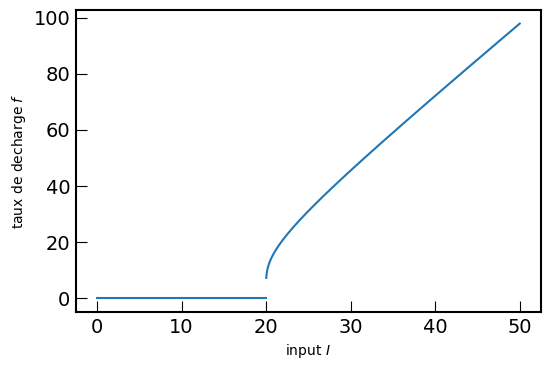

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

R = 1.
tau = 0.02
Theta = 20.

I = np.linspace(0,50,1000)
f = lambda I: 1./(tau*np.log(R*I/(R*I-Theta)))

plt.plot(I[I>Theta],f(I[I>Theta]),c='C0')
plt.plot(I[I<Theta],np.zeros(len(I[I<Theta])),c='C0')
plt.ylabel('taux de decharge $f$')
plt.xlabel('input $I$')

## E1.3 Neurone Integrate-and-Fire avec retard

Considérons maintenant un neurone avec une période réfractaire (une période après le spike pendant laquelle il n'intègre pas d'inputs). La période réfractaire dure une durée $D$. Comment le taux de décharge $f(I)$ change-t-il avec une période réfractaire de $D=5$ ms? Quelle est la nouvelle expression pour $f(I)$? Aussi, dessiner $f$ en fonction de $I$. <br> 
**Indice**: Dessinez d'abord un croquis de la dynamique du potentiel membranaire pour avoir une meilleure idée de la façon dont $D$ affecte $T$. 

## S1.3 

$$f(I) = \left( D + \tau \log \left( \frac{RI}{RI - \Theta} \right) \right)^{-1}$$

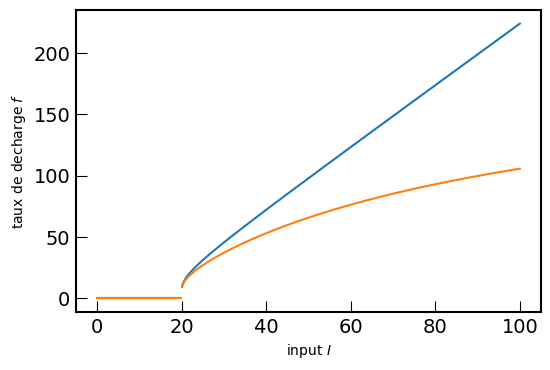

In [3]:
D  = 0.005

I = np.linspace(0,100,1001)
fD = lambda D,I: 1./(D + tau*np.log(R*I/(R*I-Theta)))

plt.plot(I[I>Theta],fD(0,I[I>Theta]),c='C0',label='$D=0$')
plt.plot(I[I<Theta],np.zeros(len(I[I<Theta])),c='C0')
plt.plot(I[I>Theta],fD(D,I[I>Theta]),c='C1',label='$D=5$ ms')
plt.plot(I[I<Theta],np.zeros(len(I[I<Theta])),c='C1')
plt.ylabel('taux de decharge $f$')
plt.xlabel('input $I$')


## 2. Activité irrégulière des neurones corticaux

Dans le cortex, le timing des potentiels d'action successifs est très irrégulier. Le coefficient de variation des intervalles inter-spike est proche de 1, similaire à un processus de Poisson. Pour un processus de Poisson, la fonction de densité de probabilité pour le temps d'attente jusqu'au spike suivant est donnée par 
$$p(T) = f {\rm e}^{-f T}$$
Ici, $T$ est l'intervalle interspike, et $f$ est le taux de décharge. 
<p>
Ainsi, la densité de l'intervalle interspike pour un train de spike de Poisson homogène est une fonction exponentielle. Les intervalles d'interspike les plus probables sont courts et les intervalles longs ont une probabilité qui diminue de façon exponentielle en fonction de leur durée. Les histogrammes d'intervalles interspike peuvent être extraits des données en traçant l'histogramme des intervalles interspike.

### E2.1  Train de spike Poisson

Générez un train de spikes de Poisson du taux $f = 10$ spk/sec. Calculez la moyenne et la variance des intervalles interspike (ISI). Vérifier que le coefficient de variation (CV = déviation standard/moyenne) est égal à un. Tracez l'histogramme ISI. Comment un train de spikes peut-il être généré à partir des ISIs? 
<br>
**Indice:** Rappelez-vous que les intervalles d'interspike d'un train de spikes Poisson sont distribués de façon exponentielle.  À son tour, le train peut être généré en tirant des nombres aléatoires de la distribution exponentielle et en les traitant comme des intervalles interspike. Utilisez la fonction numpy `np.random.exponential()` pour tirer les nombres. 


### S2.1

mean, STD, CV :  0.103215319186 0.105125989326 1.01851149767


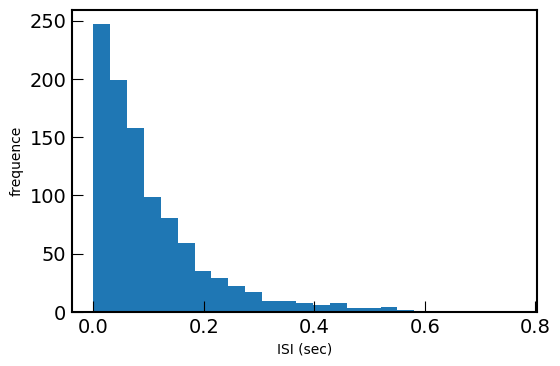

In [4]:
ISI = np.random.exponential(1./10.,size=1000)
meanISI = np.mean(ISI)
stdISI = np.std(ISI)
cv = stdISI/meanISI
print('mean, STD, CV : ', meanISI, stdISI,  cv)

plt.hist(ISI,bins=25)
plt.ylabel('frequence')
plt.xlabel('ISI (sec)')

(0, 5)

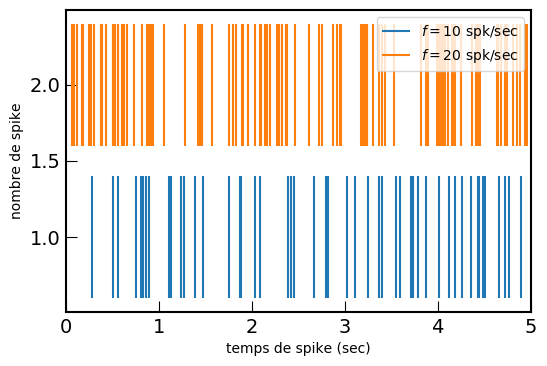

In [5]:
ISI2 = np.random.exponential(1./20.,size=1000)


spikes = np.cumsum(ISI)
spikes2 = np.cumsum(ISI2)

plt.vlines(spikes,0.6,1.4,label=r'$f=10$ spk/sec',colors='C0')
plt.vlines(spikes2,1.6,2.4,label='$f=20$ spk/sec',colors='C1')

plt.legend(loc=1)
plt.xlabel('temps de spike (sec)')
plt.ylabel('nombre de spike')
plt.xlim(0,5)

## 3. Décharge irrégulière dans le modèle Integrate-and-Fire

Ajoutons une entrée de bruit à l'équation du neurone Integrate-and-Fire ci-dessus
$$\tau \frac{dV}{dt} = -V + RI + \sigma \sqrt{\tau} \xi(t),$$
où $\sigma$ détermine l'amplitude du bruit et $\xi(t)$ est un processus de bruit blanc gaussien avec une densité de variance unitaire et moyenne zéro.
<p>
Le terme de bruit peut représenter: 
 * Bruit réel:
  * bruit de canal
  * bruit synaptique (fiabilité de la transmission synaptique)
 * Entrées synaptiques externes (inconnues et/ou variables entre les essais).

Il est implémenté comme suit dans un schéma d'intégration numérique: 
 1. Tirez un nombre aléatoire $\eta$ pour chaque pas de temps à partir d'une distribution gaussienne avec une moyenne zéro et une variance unitaire. Ceci peut être réalisé en utilisant la fonction numpy suivante: `np.random.normal()`.
 2. Échellez ce nombre par la largeur de l'intervalle de temps : $\xi = \eta/\sqrt{dt}$
 3. Utilisez ce nombre dans l'équation différentielle. 

<p>
Considérons les paramètres: $\tau=20$ ms, $R=1$, $\Theta=20$.


### E3.1 Intégration numérique d'une équation différentielle stochastique: Integrate-and-Fire avec le bruit

Écrivez un schéma d'intégration numérique de l'équation différentielle ci-dessus. Utilisez la méthode Euler : $x(t+\Delta t) = x(t) +  \Delta t (dx/dt)$ avec un largeur de pas de temps de $0.1$ ms et intégrez pendant 500 secondes. Enregistrez les temps de spikes et calculez le coefficient de variation après l'intégration. Essayez d'obtenir un $CV$ de 1 à un taux de décharge de 1 spk/sec en variant $I$ et $\sigma$. Tracer le potentiel de la membrane pendant une période de 20 sec. Inspectez l'histogramme de la distribution ISI.  



### S3.1

In [16]:
# retourne le côté droit de l'équation différentielle 
def rhs(x,dt):
    # nombre aléatoire tiré de la distribution normale
    xi = np.random.normal()/np.sqrt(dt)
    dxdt = -x + R*I + sigma*np.sqrt(tau)*xi
    return dxdt

# paramètres du modèle neuronal
sigma = 30.
R = 1.
I = 18.
tau = 0.02
Theta = 20.
Vreset = 0.

# paramètres d'intégration numérique
dt = 0.0001 # pas d'intégration
T  = 500. # durée totale en secondes
V0 = 0.

# vectoriel temporel avec une largeur de pas de 0,1 ms 
t = np.linspace(0.,T,int(T/dt) + 1)
v = np.zeros(len(t))
spikes = np.zeros(len(t))


v[0] = V0
for i in range(1,len(t)):
    v[i] = v[i-1] + rhs(v[i-1],dt)*dt
    if v[i]>Theta:
        spikes[i] = 1
        v[i] = Vreset


In [17]:
tempsSpikes = t[np.array(spikes,dtype=bool)]
isi = tempsSpikes[1:]-tempsSpikes[:-1]
CV = np.std(isi)/np.mean(isi)
print('CV : ', CV)
print('taux de décharge : ', 1./np.mean(isi), ' spk/sec ')

CV :  0.519869898885
taux de décharge :  0.297546094849  spk/sec 


(0, 20)

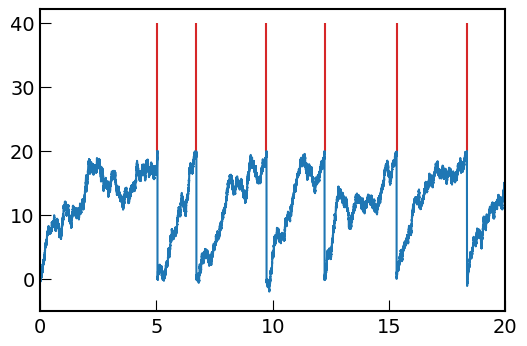

In [18]:
plt.vlines(tempsSpikes,20,40,colors='C3')
plt.plot(t,v)
plt.xlim(0,20)

(array([  8.,  12.,  17.,  16.,  17.,  10.,  16.,  13.,   3.,   8.,  11.,
          4.,   3.,   1.,   1.,   0.,   3.,   0.,   0.,   0.,   2.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.0157 ,   1.38657,   1.75744,   2.12831,   2.49918,   2.87005,
          3.24092,   3.61179,   3.98266,   4.35353,   4.7244 ,   5.09527,
          5.46614,   5.83701,   6.20788,   6.57875,   6.94962,   7.32049,
          7.69136,   8.06223,   8.4331 ,   8.80397,   9.17484,   9.54571,
          9.91658,  10.28745,  10.65832,  11.02919,  11.40006,  11.77093,
         12.1418 ]),
 <a list of 30 Patch objects>)

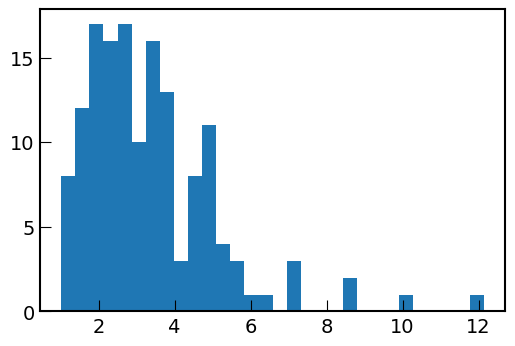

In [19]:
plt.hist(isi,bins=30)